# Unsupervised Learning: Trade&Ahead

**Marks: 60**

## Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


## Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share 
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
%matplotlib inline

import seaborn as sns
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans

from scipy.stats import zscore

import sklearn.metrics

stock_df = pd.read_csv("stock_data.csv")
stock_df.dtypes

Ticker Symbol                    object
Security                         object
GICS Sector                      object
GICS Sub Industry                object
Current Price                   float64
Price Change                    float64
Volatility                      float64
ROE                               int64
Cash Ratio                        int64
Net Cash Flow                     int64
Net Income                        int64
Earnings Per Share              float64
Estimated Shares Outstanding    float64
P/E Ratio                       float64
P/B Ratio                       float64
dtype: object

Each unique ticker symbol contains string, float, and integer data types for the different stock metrics. 

## Data Overview

- Observations
- Sanity checks

In [2]:
stock_df.head()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


The "Security" column is in place of the "Company" column.  After looking at the header, we see that the security column is actually filled with the company names. 

In [3]:
stock_df.shape

(340, 15)

In [4]:
data = pd.DataFrame.copy(stock_df)
data = data.drop("Ticker Symbol", axis=1)
data

,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,Yahoo Inc.,Information Technology,Internet Software & Services,33.259998,14.887727,1.845149,15,459,-1032187000,-4359082000,-4.64,9.394573e+08,28.976191,6.261775
336,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,4.353535e+08,17.682214,-3.838260
337,Zimmer Biomet Holdings,Health Care,Health Care Equipment,102.589996,9.347683,1.404206,1,100,376000000,147000000,0.78,1.884615e+08,131.525636,-23.884449
338,Zions Bancorp,Financials,Regional Banks,27.299999,-1.158588,1.468176,4,99,-43623000,309471000,1.20,2.578925e+08,22.749999,-0.063096


There are 340 entries and 15 columns, so we will try to use all of the data during analysis. 

In [5]:
# remove the non numerical columns - assign columns 5 to the end of the dataset 
stockDataAttr=stock_df.iloc[:,4:]
stockDataAttr.head()

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


In [6]:
# the scaled values closest to zero are closest to the mean value
stockDataScaled=stockDataAttr.apply(zscore)
stockDataScaled.head(10)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,-0.393341,0.493950,0.272749,0.989601,-0.210698,-0.339355,1.554415,1.309399,0.107863,-0.652487,-0.506653
1,-0.220837,0.355439,1.137045,0.937737,0.077269,-0.002335,0.927628,0.056755,1.250274,-0.311769,-0.504205
2,-0.367195,0.602479,-0.427007,-0.192905,-0.033488,0.454058,0.744371,0.024831,1.098021,-0.391502,0.094941
3,0.133567,0.825696,-0.284802,-0.317379,1.218059,-0.152497,-0.219816,-0.230563,-0.091622,0.947148,0.424333
4,-0.260874,-0.492636,0.296470,-0.265515,2.237018,0.133564,-0.202703,-0.374982,1.978399,3.293307,0.199196
5,-0.451251,-1.342556,-0.016049,-0.307006,-0.232849,-0.125823,0.090133,0.032432,0.048977,-0.459427,0.660752
6,1.998837,0.176091,-0.692132,-0.099549,-0.498664,0.018187,-0.228206,0.932390,-0.603923,-0.035502,9.377562
7,-0.384353,-0.158797,-0.679931,-0.317379,-0.620496,0.119096,-0.218177,-0.026856,-0.393572,-0.360984,0.071614
8,-0.230744,-0.142338,-0.774192,-0.296633,-0.675874,-0.021424,0.141806,0.053714,-0.183672,-0.319668,-0.093530
9,-0.214096,-0.087667,-0.808359,-0.265515,0.320933,-0.187053,0.263986,0.471769,-0.173153,-0.506408,-0.011879


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

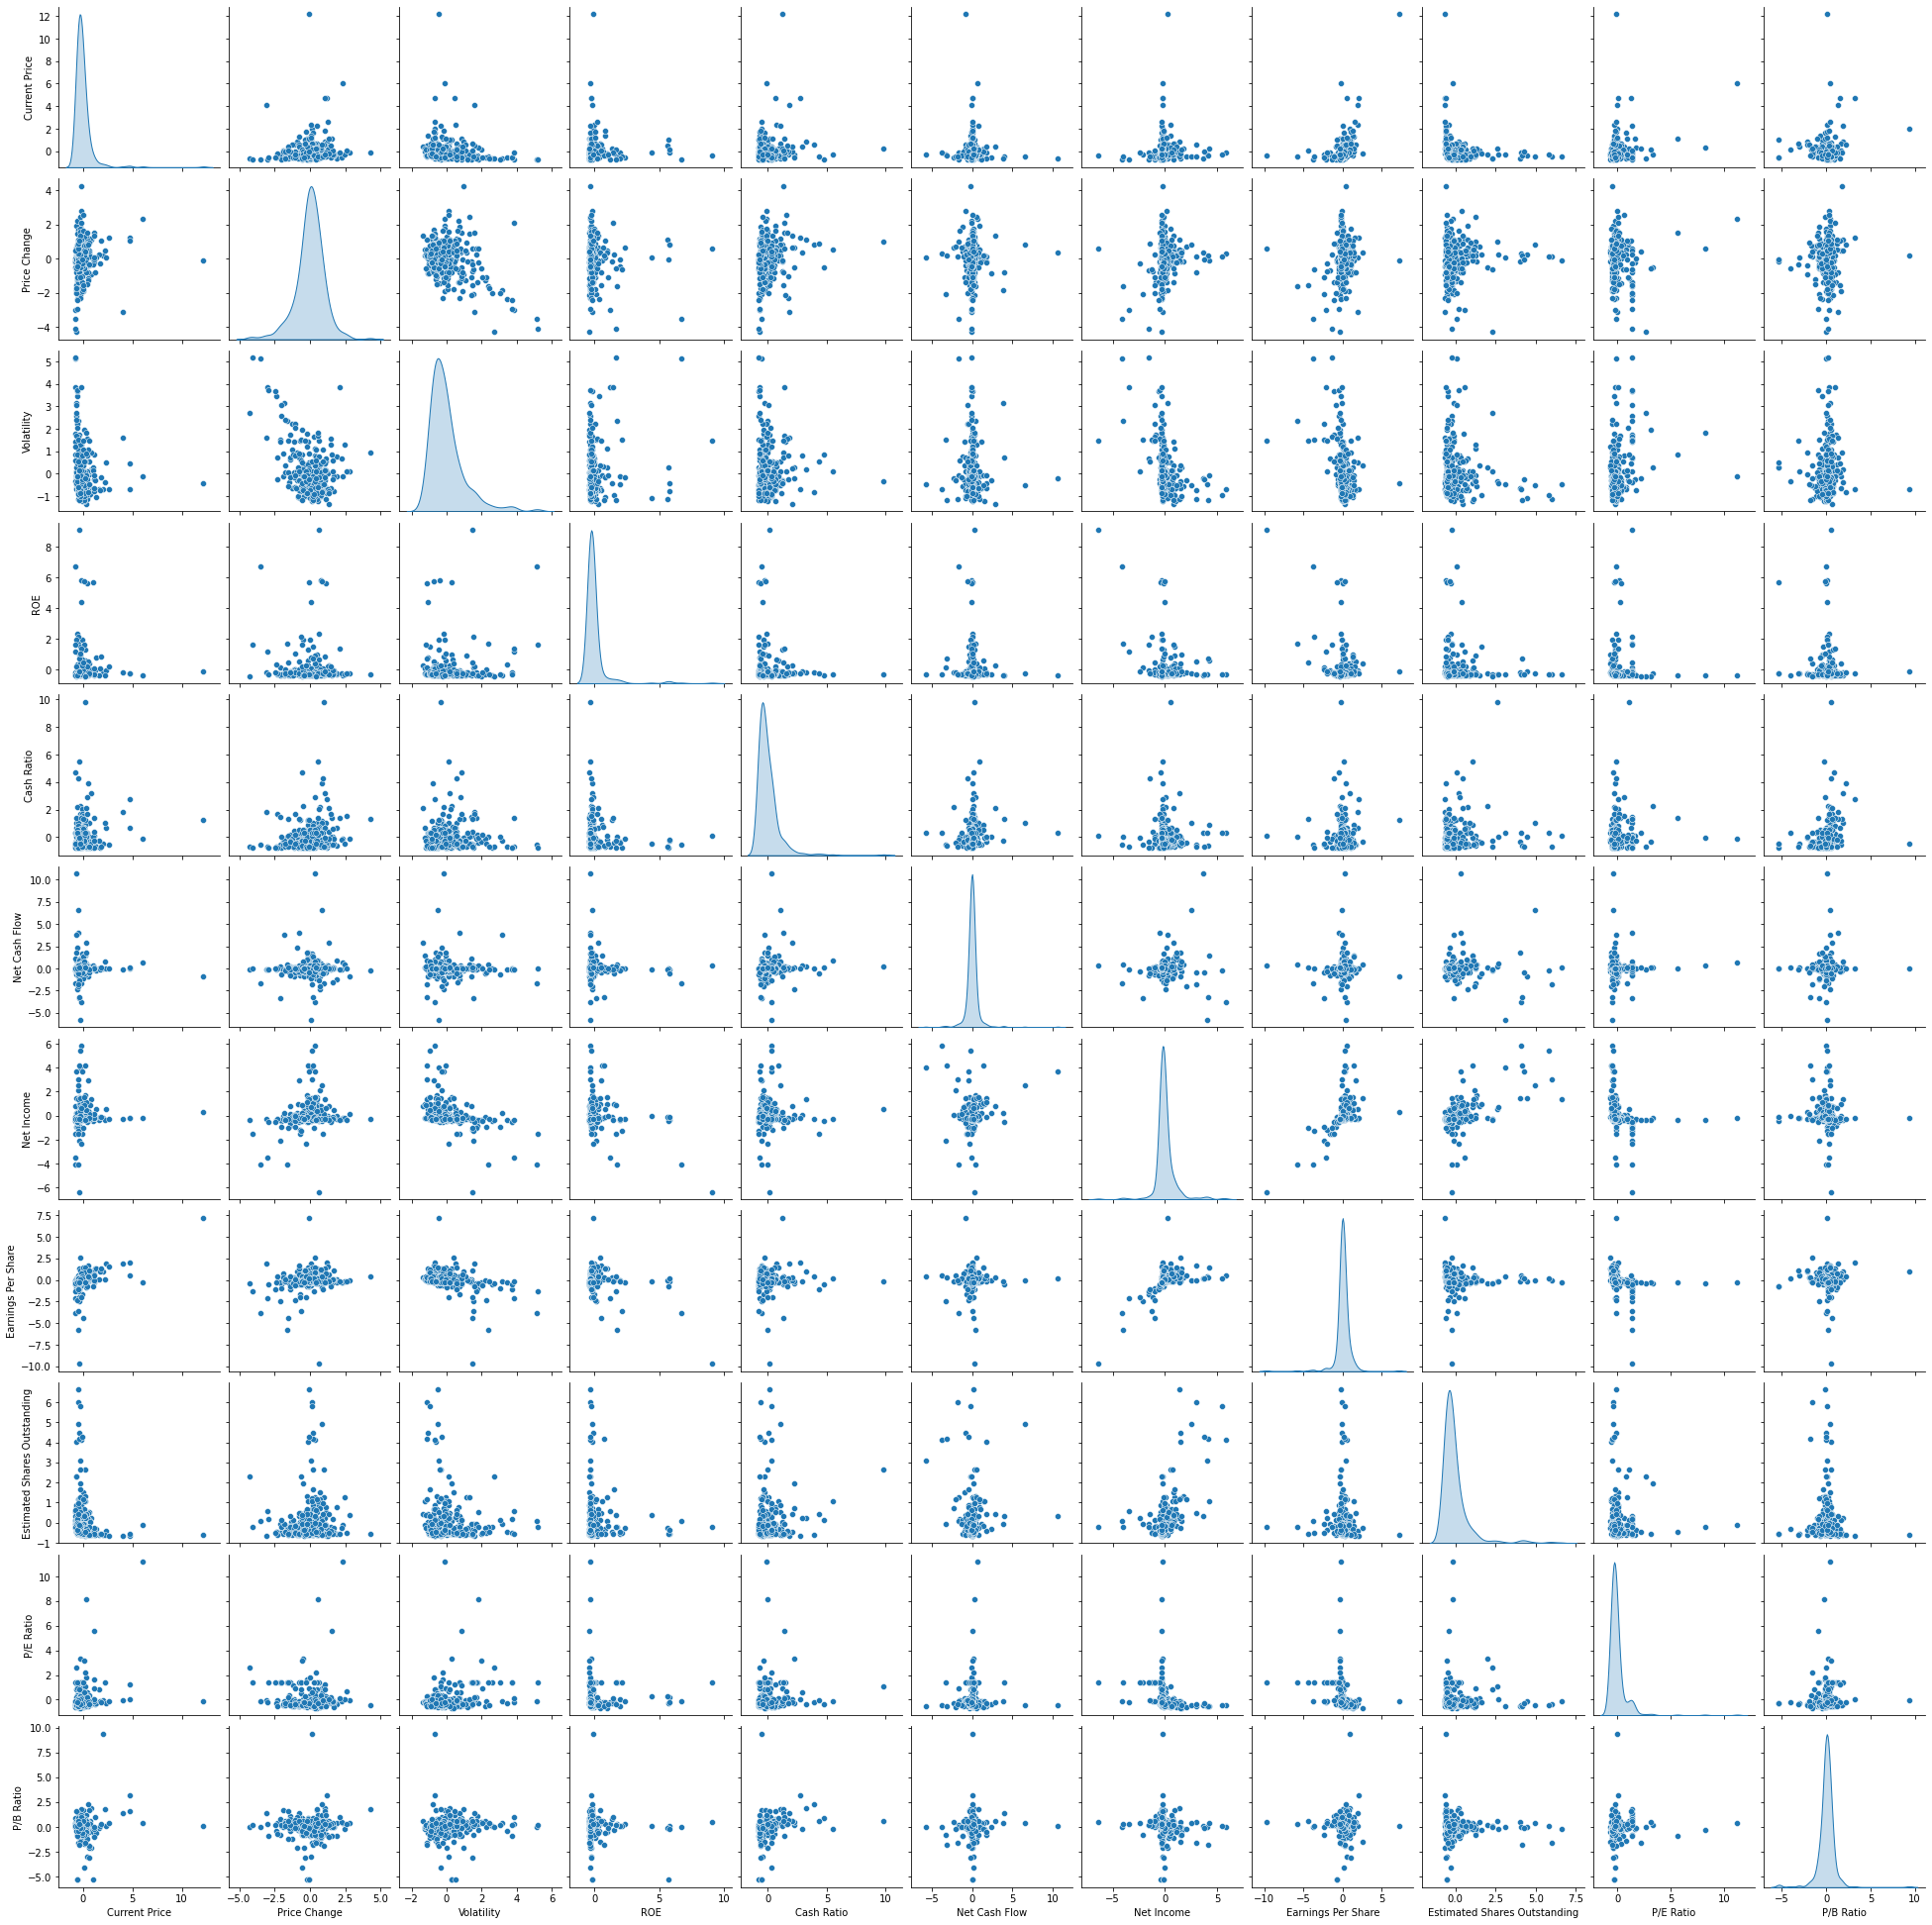

In [7]:
sns.pairplot(stockDataScaled, diag_kind='kde')

The different variables are correlated with eachother roughly, but there is not a definite positive or negative correlation between any two values. 

In [8]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Plotting histograms and boxplots for all the variables

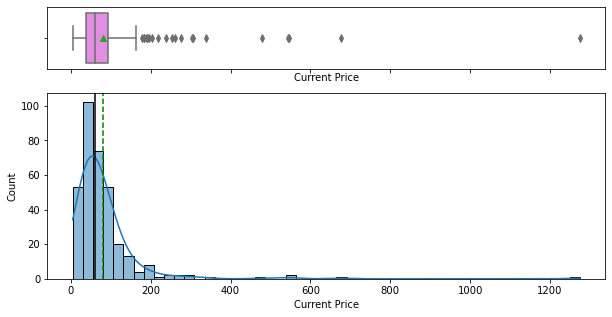

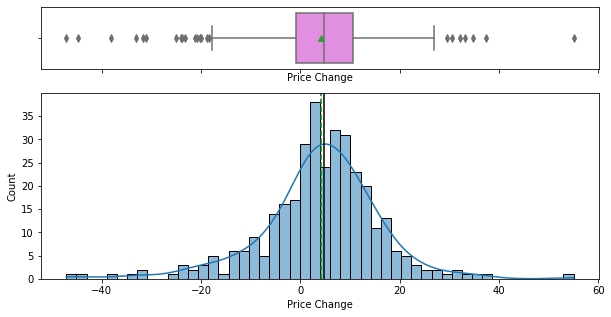

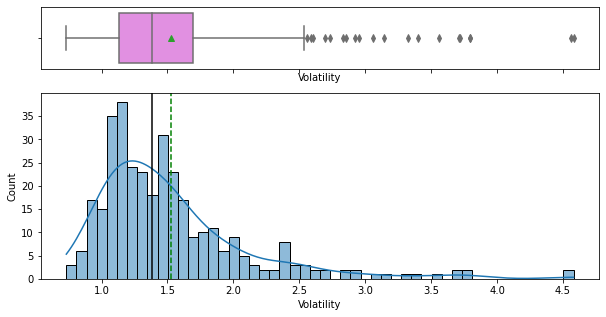

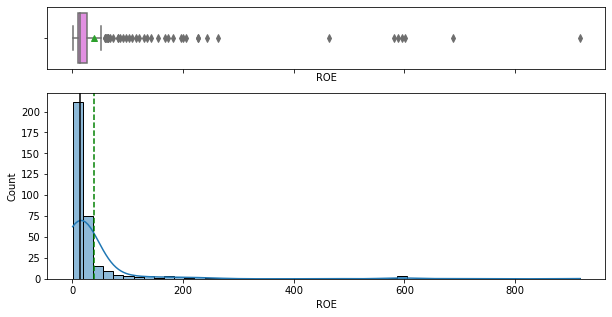

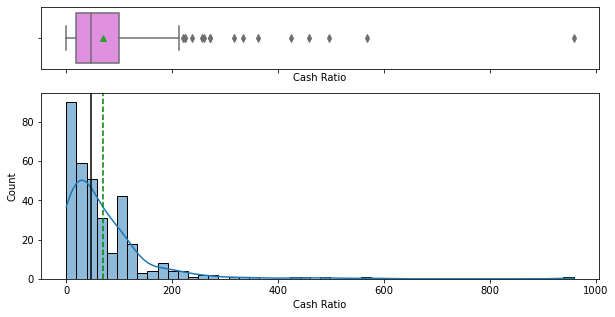

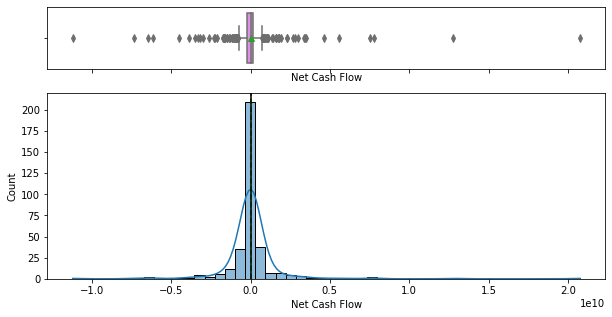

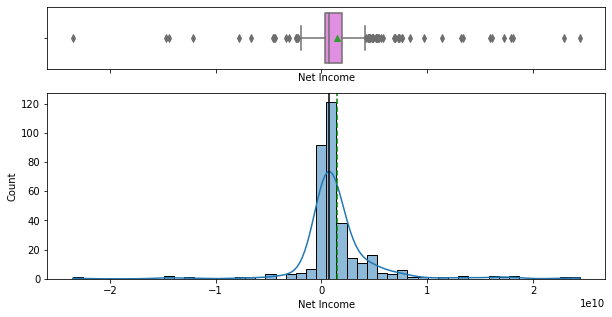

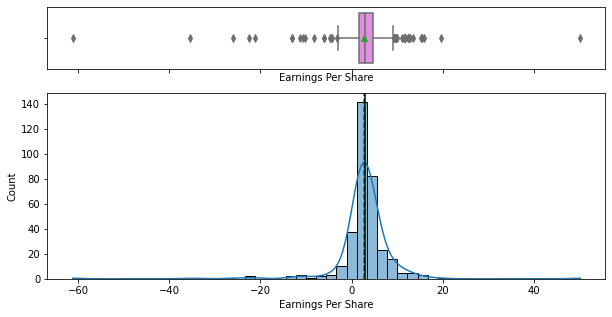

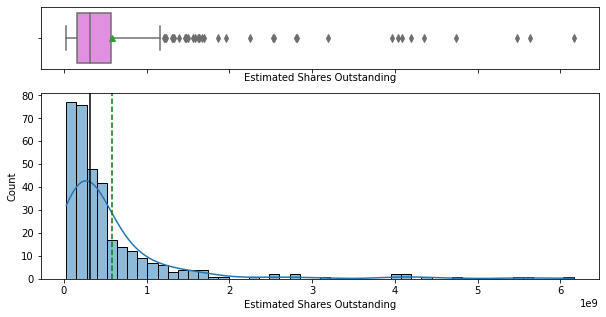

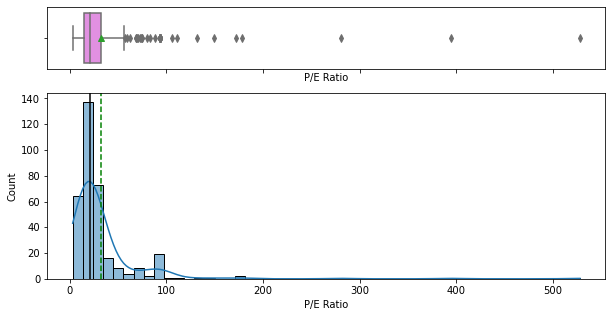

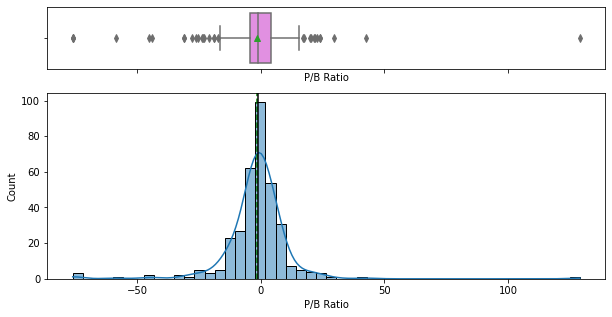

In [9]:
# selecting numerical columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()

for item in num_cols:
    histogram_boxplot(data, item, bins=50, kde=True, figsize=(10, 5))

Most of the numerical columns of stock data needs outlier treatment.  
The stock price is rightly or positively skewed.  The mean, median, and mode are all below 100. 

In [10]:
stockDataGISsector=stock_df.iloc[:,2:3]
stockDataGISsector.head()

,GICS Sector
0,Industrials
1,Health Care
2,Health Care
3,Information Technology
4,Information Technology


In [11]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

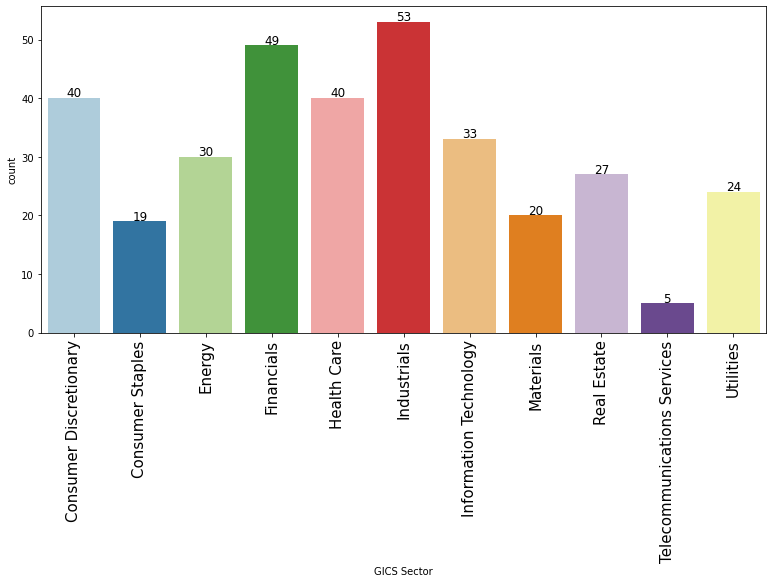

In [12]:
for feature in stockDataGISsector.columns:
    labeled_barplot(stockDataGISsector, feature)

/Users/sydneystolle/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


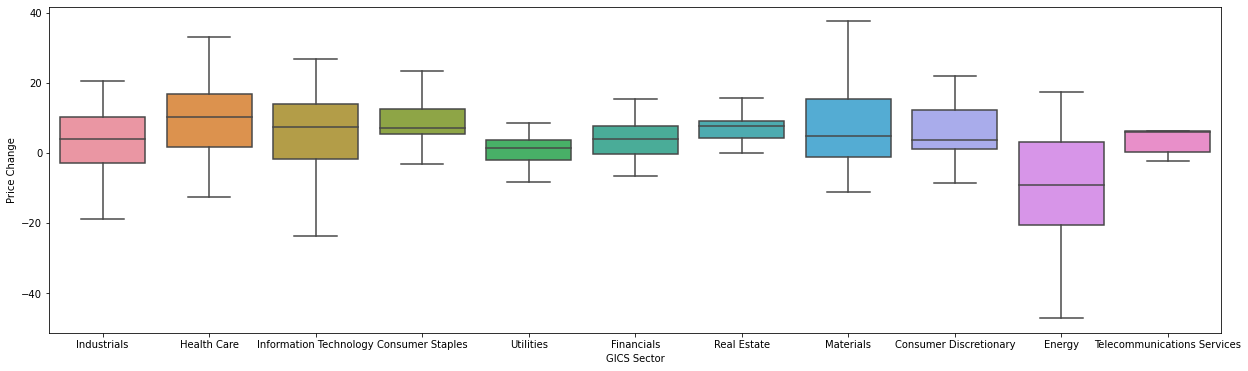

In [13]:
plt.figure(figsize=(21, 6))
sns.boxplot(stock_df["GICS Sector"], stock_df["Price Change"], showfliers=False)
plt.show()

The highest price increase, on average, would be the Health Care GIS sector, since we haven't done outlier check and treatment on the data for the Materials data.  If we were to count all of the values, the Materials sector would be the highest price change. 

/Users/sydneystolle/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


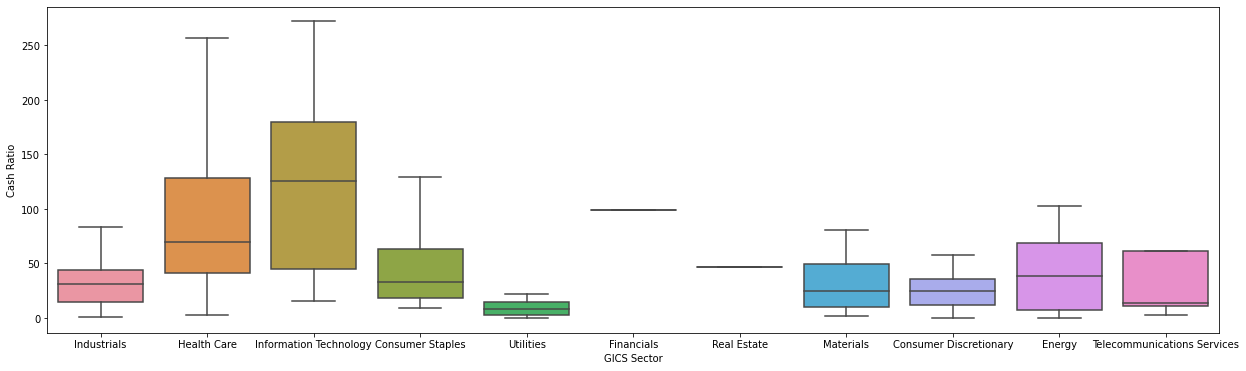

In [14]:
plt.figure(figsize=(21, 6))
sns.boxplot(stock_df["GICS Sector"], stock_df["Cash Ratio"], showfliers=False)
plt.show()

The medians are all below 50 cash ratio, except the Health Care and Information Technology GIS sectors.  The maximums are all below 150, except the Health Care and Information Technology sectors.  While the Health Care median is around 75 cash ratio, the maximum is comparable to the Information Technology Maximum which are above the 250 cash ratio mark. 

/Users/sydneystolle/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


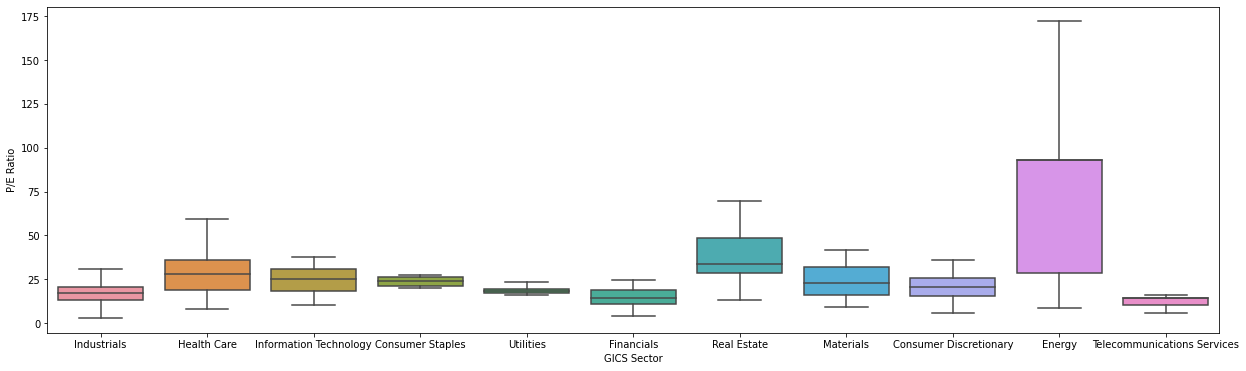

In [15]:
plt.figure(figsize=(21, 6))
sns.boxplot(stock_df["GICS Sector"], stock_df["P/E Ratio"], showfliers=False)
plt.show()

Most investors are willing to invest in Energy and Real Estate stocks or sectors, even though there are higher cash ratios and price changes in different stocks. 

## Data Preprocessing

- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

In [16]:
# display all of the rows and columns with duplicated values
data.loc[data.duplicated(), :]

,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio


In [17]:
data.isna().sum()

Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

In [18]:
data.isnull().sum()

Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

In [19]:
# use z score for outlier treatment, since some numerical columns are skewed right or left
cols = data.select_dtypes('number').columns
df_sub = data.loc[:, cols]
lim = np.abs((df_sub - df_sub.mean()) / df_sub.std(ddof=0)) <3 
data.loc[:, cols] = df_sub.where(lim, np.nan)
data

,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135.0,51.0,-6.040000e+08,7.610000e+09,11.39,6.681299e+08,3.718174,-8.784219
1,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130.0,77.0,5.100000e+07,5.144000e+09,3.15,1.633016e+09,18.806350,-8.750068
2,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21.0,67.0,9.380000e+08,4.423000e+09,2.94,1.504422e+09,15.275510,-0.394171
3,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9.0,180.0,-2.408400e+08,6.295510e+08,1.26,4.996437e+08,74.555557,4.199651
4,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14.0,272.0,3.151200e+08,6.968780e+08,0.31,2.247994e+09,NaN,1.059810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,Yahoo Inc.,Information Technology,Internet Software & Services,33.259998,14.887727,1.845149,15.0,NaN,-1.032187e+09,-4.359082e+09,-4.64,9.394573e+08,28.976191,6.261775
336,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142.0,27.0,1.590000e+08,1.293000e+09,2.97,4.353535e+08,17.682214,-3.838260
337,Zimmer Biomet Holdings,Health Care,Health Care Equipment,102.589996,9.347683,1.404206,1.0,100.0,3.760000e+08,1.470000e+08,0.78,1.884615e+08,131.525636,-23.884449
338,Zions Bancorp,Financials,Regional Banks,27.299999,-1.158588,1.468176,4.0,99.0,-4.362300e+07,3.094710e+08,1.20,2.578925e+08,22.749999,-0.063096


In [20]:
# Below is the total number of columns treated with outlier treatment
data.isna().sum()

Security                         0
GICS Sector                      0
GICS Sub Industry                0
Current Price                    5
Price Change                     5
Volatility                       9
ROE                              7
Cash Ratio                       6
Net Cash Flow                    8
Net Income                      12
Earnings Per Share               6
Estimated Shares Outstanding    10
P/E Ratio                        5
P/B Ratio                        8
dtype: int64

In [21]:
data = data.fillna(data.median())
data.isna().sum()

Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

In [22]:
# testing to ensure there were not any entry mistakes 
data.groupby(["GICS Sector"]).size().reset_index(name="Time")

,GICS Sector,Time
0,Consumer Discretionary,40
1,Consumer Staples,19
2,Energy,30
3,Financials,49
4,Health Care,40
5,Industrials,53
6,Information Technology,33
7,Materials,20
8,Real Estate,27
9,Telecommunications Services,5


Feature engineering and other processing steps are not needed for this dataset to proceed to the k means and hierarchial clustering. 

## K-means Clustering

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

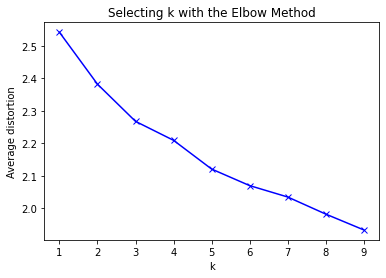

In [23]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

# in each loop try different k's using scaled data 
# get the assigned clusters with predict 
# take the nimimum to find the difference of point to centroid and sum up distances and average them 
for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(stockDataScaled)
    prediction=model.predict(stockDataScaled)
    meanDistortions.append(sum(np.min(cdist(stockDataScaled, model.cluster_centers_, 'euclidean'), axis=1)) / stockDataScaled.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

There is a tiny elbow at 4 clusters, large elbow at 6, and backwards elbow at 7, so we will look at clusters 4 and 6 to continue our analysis with. 

In [24]:
# Let us first start with K = 4
final_model=KMeans(4)
final_model.fit(stockDataScaled)
prediction=final_model.predict(stockDataScaled)

#Append the prediction 
# copied dataset
data["GROUP"] = prediction
# scaled dataset
stockDataScaled["GROUP"] = prediction
print("Groups Assigned : \n")
# append table with new group 
data.head()

Groups Assigned : 



,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,GROUP
0,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135.0,51.0,-604000000.0,7.610000e+09,11.39,6.681299e+08,3.718174,-8.784219,3
1,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130.0,77.0,51000000.0,5.144000e+09,3.15,1.633016e+09,18.806350,-8.750068,3
2,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21.0,67.0,938000000.0,4.423000e+09,2.94,1.504422e+09,15.275510,-0.394171,3
3,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9.0,180.0,-240840000.0,6.295510e+08,1.26,4.996437e+08,74.555557,4.199651,3
4,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14.0,272.0,315120000.0,6.968780e+08,0.31,2.247994e+09,20.819876,1.059810,2


### Now we analyze the distribution of the data among the three groups (K = 4). One of the most informative visual tool is boxplot.

In [25]:
stockDataClust = data.groupby(['GROUP'])
stockDataClust.mean()

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
GROUP,,,,,,,,,,,
0,50.517273,5.747586,1.130399,31.090909,75.909091,1.303564e+07,3.452664e+09,4.154545,4.041542e+08,14.803577,-4.552119
1,38.099260,-10.010582,2.183869,48.777778,50.037037,-1.997546e+08,-1.383425e+09,-2.767963,4.803986e+08,71.184516,1.342067
2,105.224134,12.915430,1.633376,25.600000,157.840000,4.130944e+08,9.649506e+08,4.159800,5.783163e+08,37.978993,7.458805
3,72.399112,5.066225,1.388319,24.671480,53.000000,-1.404622e+07,1.482212e+09,3.621029,4.385338e+08,23.843656,-2.021622


array([[<AxesSubplot:title={'center':'Cash Ratio'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Current Price'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Earnings Per Share'}, xlabel='[GROUP]'>],
       [<AxesSubplot:title={'center':'Estimated Shares Outstanding'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Net Cash Flow'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Net Income'}, xlabel='[GROUP]'>],
       [<AxesSubplot:title={'center':'P/B Ratio'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'P/E Ratio'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Price Change'}, xlabel='[GROUP]'>],
       [<AxesSubplot:title={'center':'ROE'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Volatility'}, xlabel='[GROUP]'>,
        <AxesSubplot:>]], dtype=object)

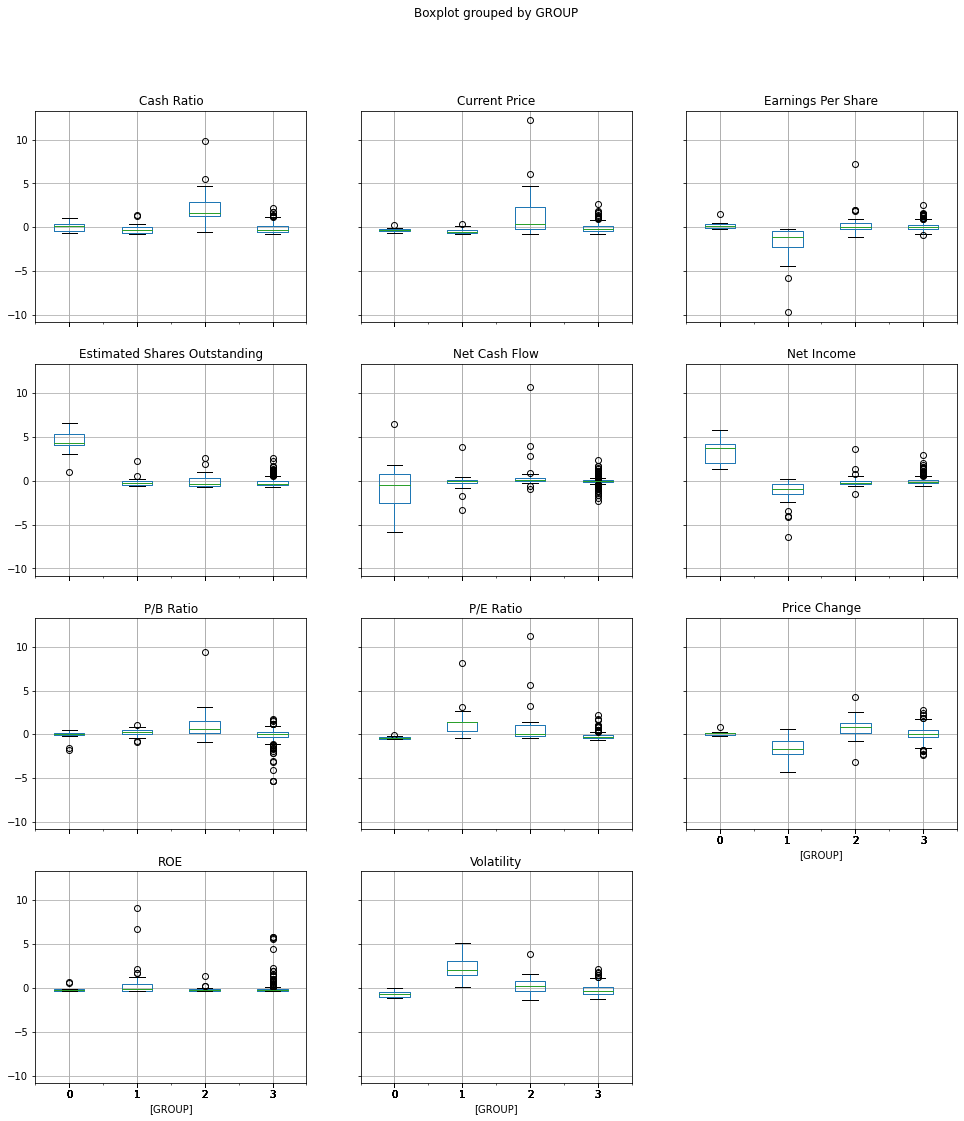

In [26]:
stockDataScaled.boxplot(by='GROUP', layout = (4,3),figsize=(16,18))

In [27]:
stockDataClust["GROUP"].value_counts()

GROUP  GROUP
0      0         11
1      1         27
2      2         25
3      3        277
Name: GROUP, dtype: int64

### Now we will try with K = 6, the next elbow point

In [28]:
# Let us first start with K = 6
final_model=KMeans(6)
final_model.fit(stockDataScaled)
prediction=final_model.predict(stockDataScaled)

#Append the prediction 
data["GROUP"] = prediction
stockDataScaled["GROUP"] = prediction
print("Groups Assigned : \n")
data.head()

Groups Assigned : 



,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,GROUP
0,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135.0,51.0,-604000000.0,7.610000e+09,11.39,6.681299e+08,3.718174,-8.784219,1
1,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130.0,77.0,51000000.0,5.144000e+09,3.15,1.633016e+09,18.806350,-8.750068,1
2,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21.0,67.0,938000000.0,4.423000e+09,2.94,1.504422e+09,15.275510,-0.394171,1
3,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9.0,180.0,-240840000.0,6.295510e+08,1.26,4.996437e+08,74.555557,4.199651,1
4,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14.0,272.0,315120000.0,6.968780e+08,0.31,2.247994e+09,20.819876,1.059810,0


In [29]:
stockDataClust = data.groupby(['GROUP'])
stockDataClust.mean()

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
GROUP,,,,,,,,,,,
0,100.651334,11.400145,1.602847,30.040000,160.120000,4.701783e+08,1.420009e+09,4.672600,6.217026e+08,37.212398,8.154060
1,71.739095,4.961968,1.392411,24.849265,53.485294,-9.180162e+06,1.496827e+09,3.659136,4.401685e+08,23.640434,-2.025338
2,46.672222,5.166566,1.079367,25.000000,58.333333,-2.980784e+08,2.873648e+09,3.435556,2.981832e+08,15.596051,-6.354193
3,36.055417,-12.405154,2.190568,53.375000,49.333333,-1.460040e+08,-1.619502e+09,-3.372292,4.795297e+08,74.152702,1.616904
4,121.446665,21.917380,2.029752,4.000000,106.000000,6.982407e+08,2.875470e+08,0.750000,3.667632e+08,20.819876,-5.322376
5,84.355716,9.997310,1.373337,15.000000,33.571429,-5.684000e+08,6.898350e+08,1.950000,3.981690e+08,42.284541,-0.852425


array([[<AxesSubplot:title={'center':'Cash Ratio'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Current Price'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Earnings Per Share'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Estimated Shares Outstanding'}, xlabel='[GROUP]'>],
       [<AxesSubplot:title={'center':'Net Cash Flow'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Net Income'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'P/B Ratio'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'P/E Ratio'}, xlabel='[GROUP]'>],
       [<AxesSubplot:title={'center':'Price Change'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'ROE'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Volatility'}, xlabel='[GROUP]'>,
        <AxesSubplot:>]], dtype=object)

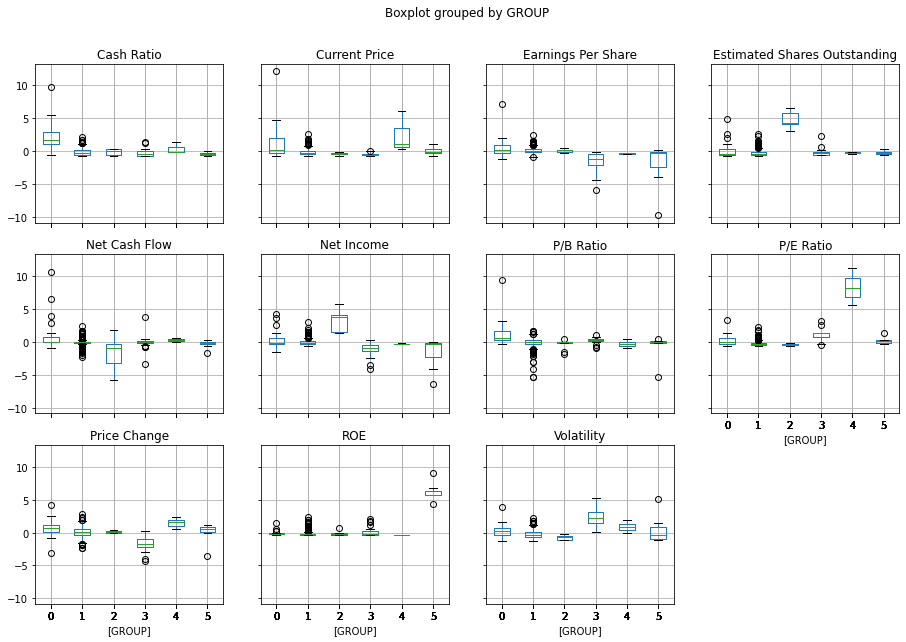

In [30]:
stockDataScaled.boxplot(by='GROUP', layout = (3,4),figsize=(15,10))

In [31]:
stockDataClust["GROUP"].value_counts()

GROUP  GROUP
0      0         25
1      1        272
2      2          9
3      3         24
4      4          3
5      5          7
Name: GROUP, dtype: int64

For the clustering k means method of choice, k=4, the boxplot graph shows high P/E ratio outliers, high P/B ratio outliers, high cash ratio outliers, high current price outliers, and medium to high earnings per share.  

When k=4, we have 4 groups, the table of the mean value of the clusters do not include NaN values, less negative values, and the graphs are comparable to each other.  Overall the clusters are the best when k=4, when compared to k=6. 
The value counts, or number of companies per cluster, is substantial for all of the four clusters, but there are two groups, of two and three, when we model with six clusters.  This is another reason why we are going with k=4 clusters for the k means clustering analysis. 

## Hierarchical Clustering

In [32]:
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

In [33]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(stockDataScaled, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(stockDataScaled))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.931639439314184.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7794658493750933.
Cophenetic correlation for Euclidean distance and average linkage is 0.9406034085714002.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8852138238565269.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9123418921260171.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.7706825023714282.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9292311269179433.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.899038008200495.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.9297542068207354.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7894157599928375.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9303250841103157.
Cophenetic corr

In [34]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9406034085714002, which is obtained with Euclidean distance and average linkage.


**Let's explore different linkage methods with Euclidean distance only.**

In [35]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(stockDataScaled, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(stockDataScaled))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.931639439314184.
Cophenetic correlation for complete linkage is 0.7794658493750933.
Cophenetic correlation for average linkage is 0.9406034085714002.
Cophenetic correlation for centroid linkage is 0.940214421907495.
Cophenetic correlation for ward linkage is 0.7244445933736113.
Cophenetic correlation for weighted linkage is 0.8852138238565269.


In [36]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9406034085714002, which is obtained with average linkage.


**We see that the cophenetic correlation is maximum with Euclidean distance and average linkage.**

**Let's see the dendrograms for the different linkage methods.**

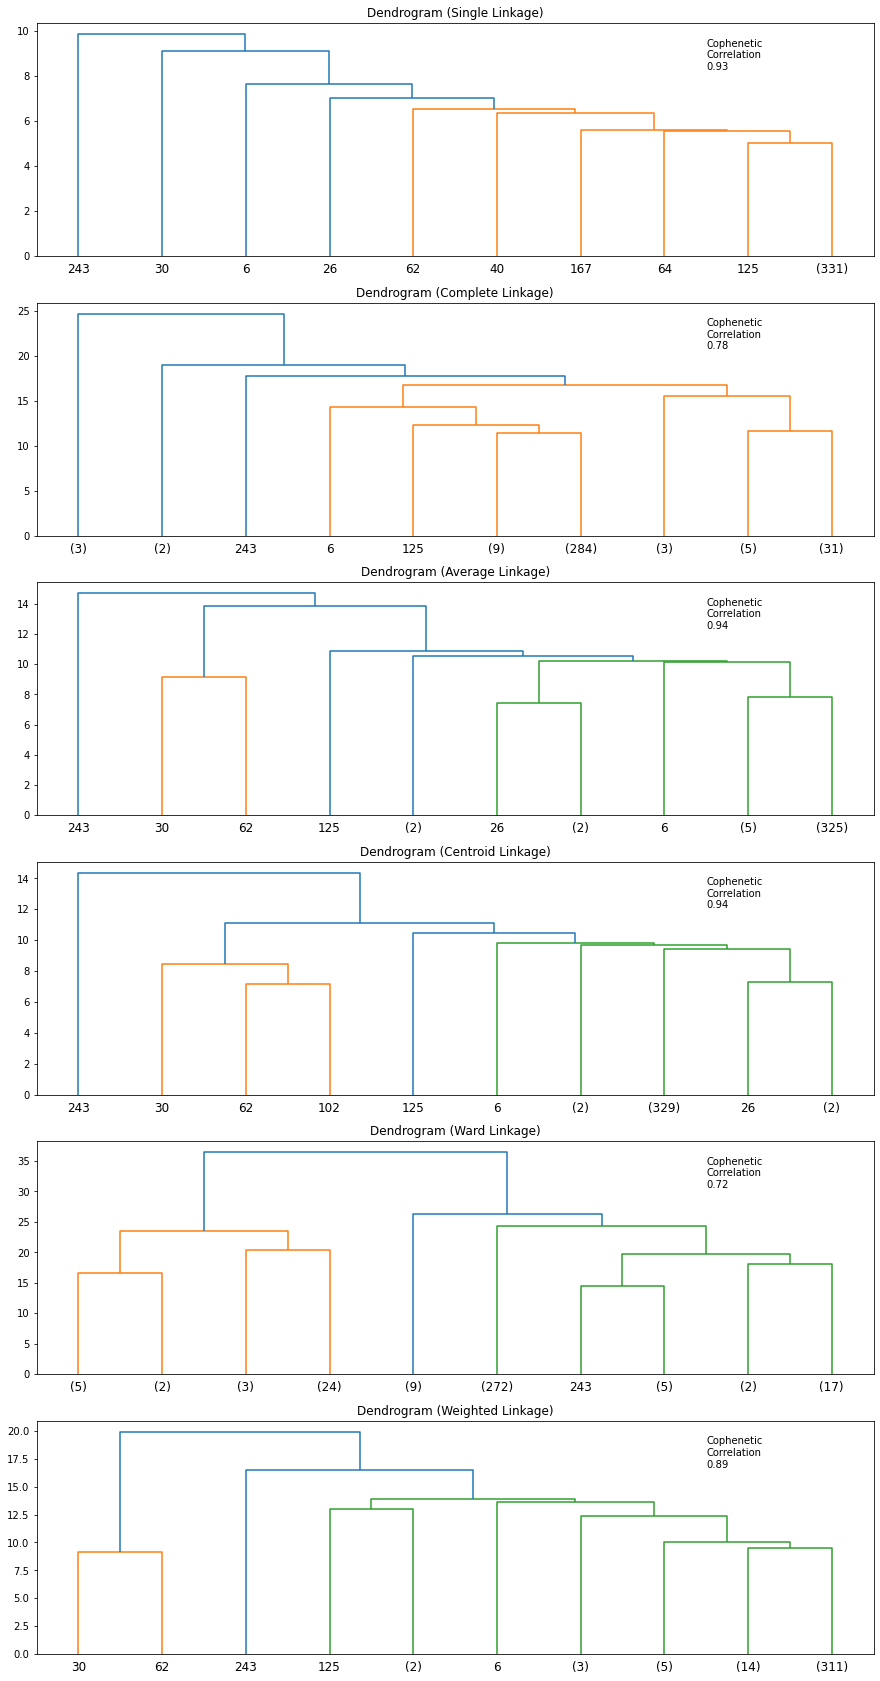

In [37]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(stockDataScaled, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i], p=10, truncate_mode = "lastp")
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(stockDataScaled))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

**Observations**

- The cophenetic correlation is highest for average and centroid linkage methods.
- We will move ahead with average linkage.
- 11 appears to be the appropriate number of clusters from the dendrogram for average linkage.

In [38]:
HCmodel = AgglomerativeClustering(n_clusters=11, affinity="euclidean", linkage="average")
HCmodel.fit(stockDataScaled)

AgglomerativeClustering(linkage='average', n_clusters=11)

In [39]:
stockDataScaled["HC_Clusters"] = HCmodel.labels_
stock_df["HC_Clusters"] = HCmodel.labels_

## Cluster Profiling

In [40]:
cluster_profile = stock_df.groupby("HC_Clusters").mean()

In [41]:
cluster_profile["count_in_each_segments"] = (
    stock_df.groupby("HC_Clusters")["P/E Ratio"].count().values
)

In [42]:
# let's see the names of the companies in each cluster
# remember the company column is named Security
for cl in stock_df["HC_Clusters"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(stock_df[stock_df["HC_Clusters"] == cl]["Security"].unique())
    print()

In cluster 1, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Ameren Corp' 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Amgen Inc' 'Ameriprise Financial' 'American Tower Corp A'
 'AutoNation Inc' 'Anthem Inc.' 'Aon plc' 'Anadarko Petroleum Corp'
 'Amphenol Corp' 'Arconic Inc' 'Activision Blizzard'
 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'Baker Hughes Inc' 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.'
 'Ball Corp' 'Bristol-Myers Squibb' 'Boston Scientific' 'Borg

**We see that there are 6 clusters of one company, 3 cluster of two companies, 1 cluster with 9 companies, and all the other companies are grouped into another cluster. This clustering does not look good as the clusters do not have enough variability.**

**Let us try using Ward linkage as it has more distinct and separated clusters (as seen from it's dendrogram before). 20 appears to be the appropriate number of clusters from the dendrogram for Ward linkage.**

In [43]:
HCmodel = AgglomerativeClustering(n_clusters=20, affinity="euclidean", linkage="ward")
HCmodel.fit(stockDataScaled)

AgglomerativeClustering(n_clusters=20)

In [44]:
stockDataScaled["HC_Clusters"] = HCmodel.labels_
stock_df["HC_Clusters"] = HCmodel.labels_

## Cluster Profiling

In [45]:
cluster_profile = stock_df.groupby("HC_Clusters").mean()

In [46]:
cluster_profile["count_in_each_segments"] = (
    stock_df.groupby("HC_Clusters")["Security"].count().values
)

In [47]:
# let's see the names of the countries in each cluster
for cl in stock_df["HC_Clusters"].unique():
    print(
        "The",
        stock_df[stock_df["HC_Clusters"] == cl]["Security"].nunique(),
        "companies in cluster",
        cl,
        "are:",
    )
    print(stock_df[stock_df["HC_Clusters"] == cl]["Security"].unique())
    print("-" * 100, "\n")

The 13 companies in cluster 15 are:
['American Airlines Group' 'AbbVie' 'The Walt Disney Company'
 'Gilead Sciences' 'General Motors' 'International Business Machines'
 'Mondelez International' 'Altria Group Inc' 'PepsiCo Inc.'
 'Philip Morris International' 'United Continental Holdings'
 'United Parcel Service' 'United Technologies']
---------------------------------------------------------------------------------------------------- 

The 114 companies in cluster 1 are:
['Abbott Laboratories' 'Ameren Corp' 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Alaska Air Group Inc'
 'Allstate Corp' 'AMETEK Inc' 'Ameriprise Financial' 'AutoNation Inc'
 'Aon plc' 'American Water Works Company Inc' 'American Express Co'
 'BB&T Corporation' 'The Bank of New York Mellon Corp.' 'Caterpillar Inc.'
 'CBRE Group' 'Citizens Financial Group' 'Church & Dwight'
 'C. H. Robinson Worldwide' 'CIGNA Corp.' 

**Now the clusters seem to have more variability.**

In [48]:
# lets display cluster profile
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segments
HC_Clusters,,,,,,,,,,,,
0,46.672222,5.166566,1.079367,25.000000,58.333333,-3040666666.666667,14848444444.444445,3.435556,4564959946.222222,15.596051,-6.354193,9
1,57.599720,1.565984,1.262167,17.421053,50.175439,157644219.298246,1345248385.964912,3.178026,464351146.315263,20.729502,-3.268187,114
2,49.702143,-8.626732,2.411987,55.857143,73.785714,-578570000.000000,-3559801785.714286,-10.795714,326820916.124286,88.159090,3.518193,14
3,108.304002,10.737770,1.165694,566.200000,26.600000,-278760000.000000,687180000.000000,1.548000,349607057.720000,34.898915,-16.851358,5
4,61.700339,-8.987535,1.748408,21.615385,77.807692,75887423.076923,901004923.076923,3.288077,311573555.681154,22.079907,5.020984,26
5,116.440891,11.131636,1.243725,25.468750,36.515625,-93836500.000000,1540786203.125000,5.297031,287450613.630469,29.688099,-4.337746,64
6,1274.949951,3.190527,1.268340,29.000000,184.000000,-1671386000.000000,2551360000.000000,50.090000,50935516.070000,25.453183,-1.052429,1
7,25.640000,11.237908,1.322355,12.500000,130.500000,16755500000.000000,13654000000.000000,3.295000,2791829362.100000,13.649696,1.508484,2
8,52.488958,12.571634,1.672809,30.708333,69.562500,-317545437.500000,765993875.000000,2.086042,466791494.440208,26.013421,2.231135,48


IndexError: list index out of range

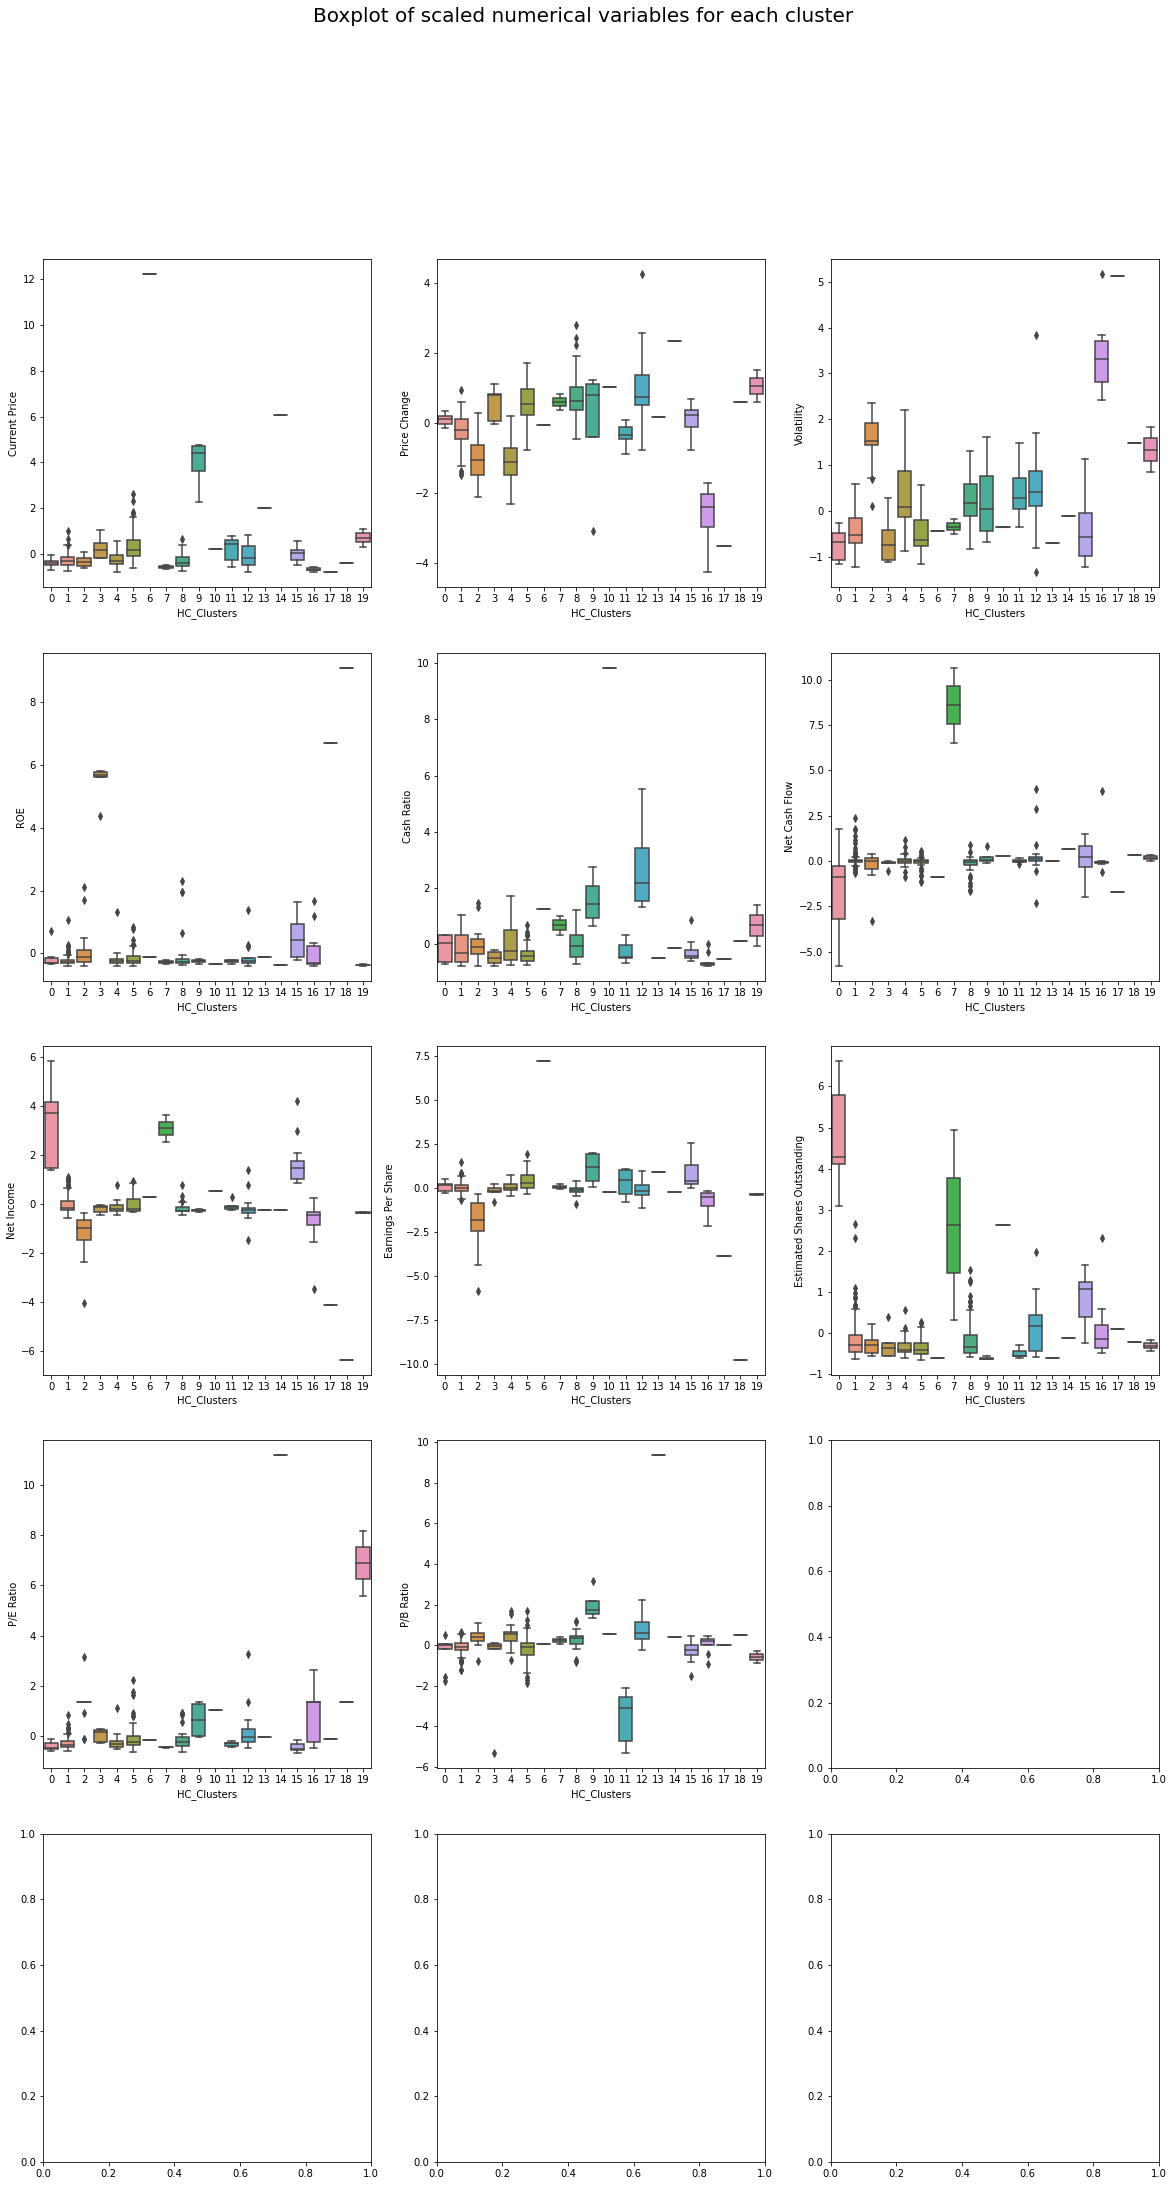

In [49]:
fig, axes = plt.subplots(5, 3, figsize=(20, 35))
fig.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(19):
    sns.boxplot(
        ax=axes[ii][0],
        y=stockDataScaled[num_cols[counter]],
        x=stockDataScaled["HC_Clusters"],
    )
    counter = counter + 1
    sns.boxplot(
        ax=axes[ii][1],
        y=stockDataScaled[num_cols[counter]],
        x=stockDataScaled["HC_Clusters"],
    )
    counter = counter + 1
    sns.boxplot(
        ax=axes[ii][2],
        y=stockDataScaled[num_cols[counter]],
        x=stockDataScaled["HC_Clusters"],
    )
    counter = counter + 1


fig.tight_layout(pad=2.0)

IndexError: list index out of range

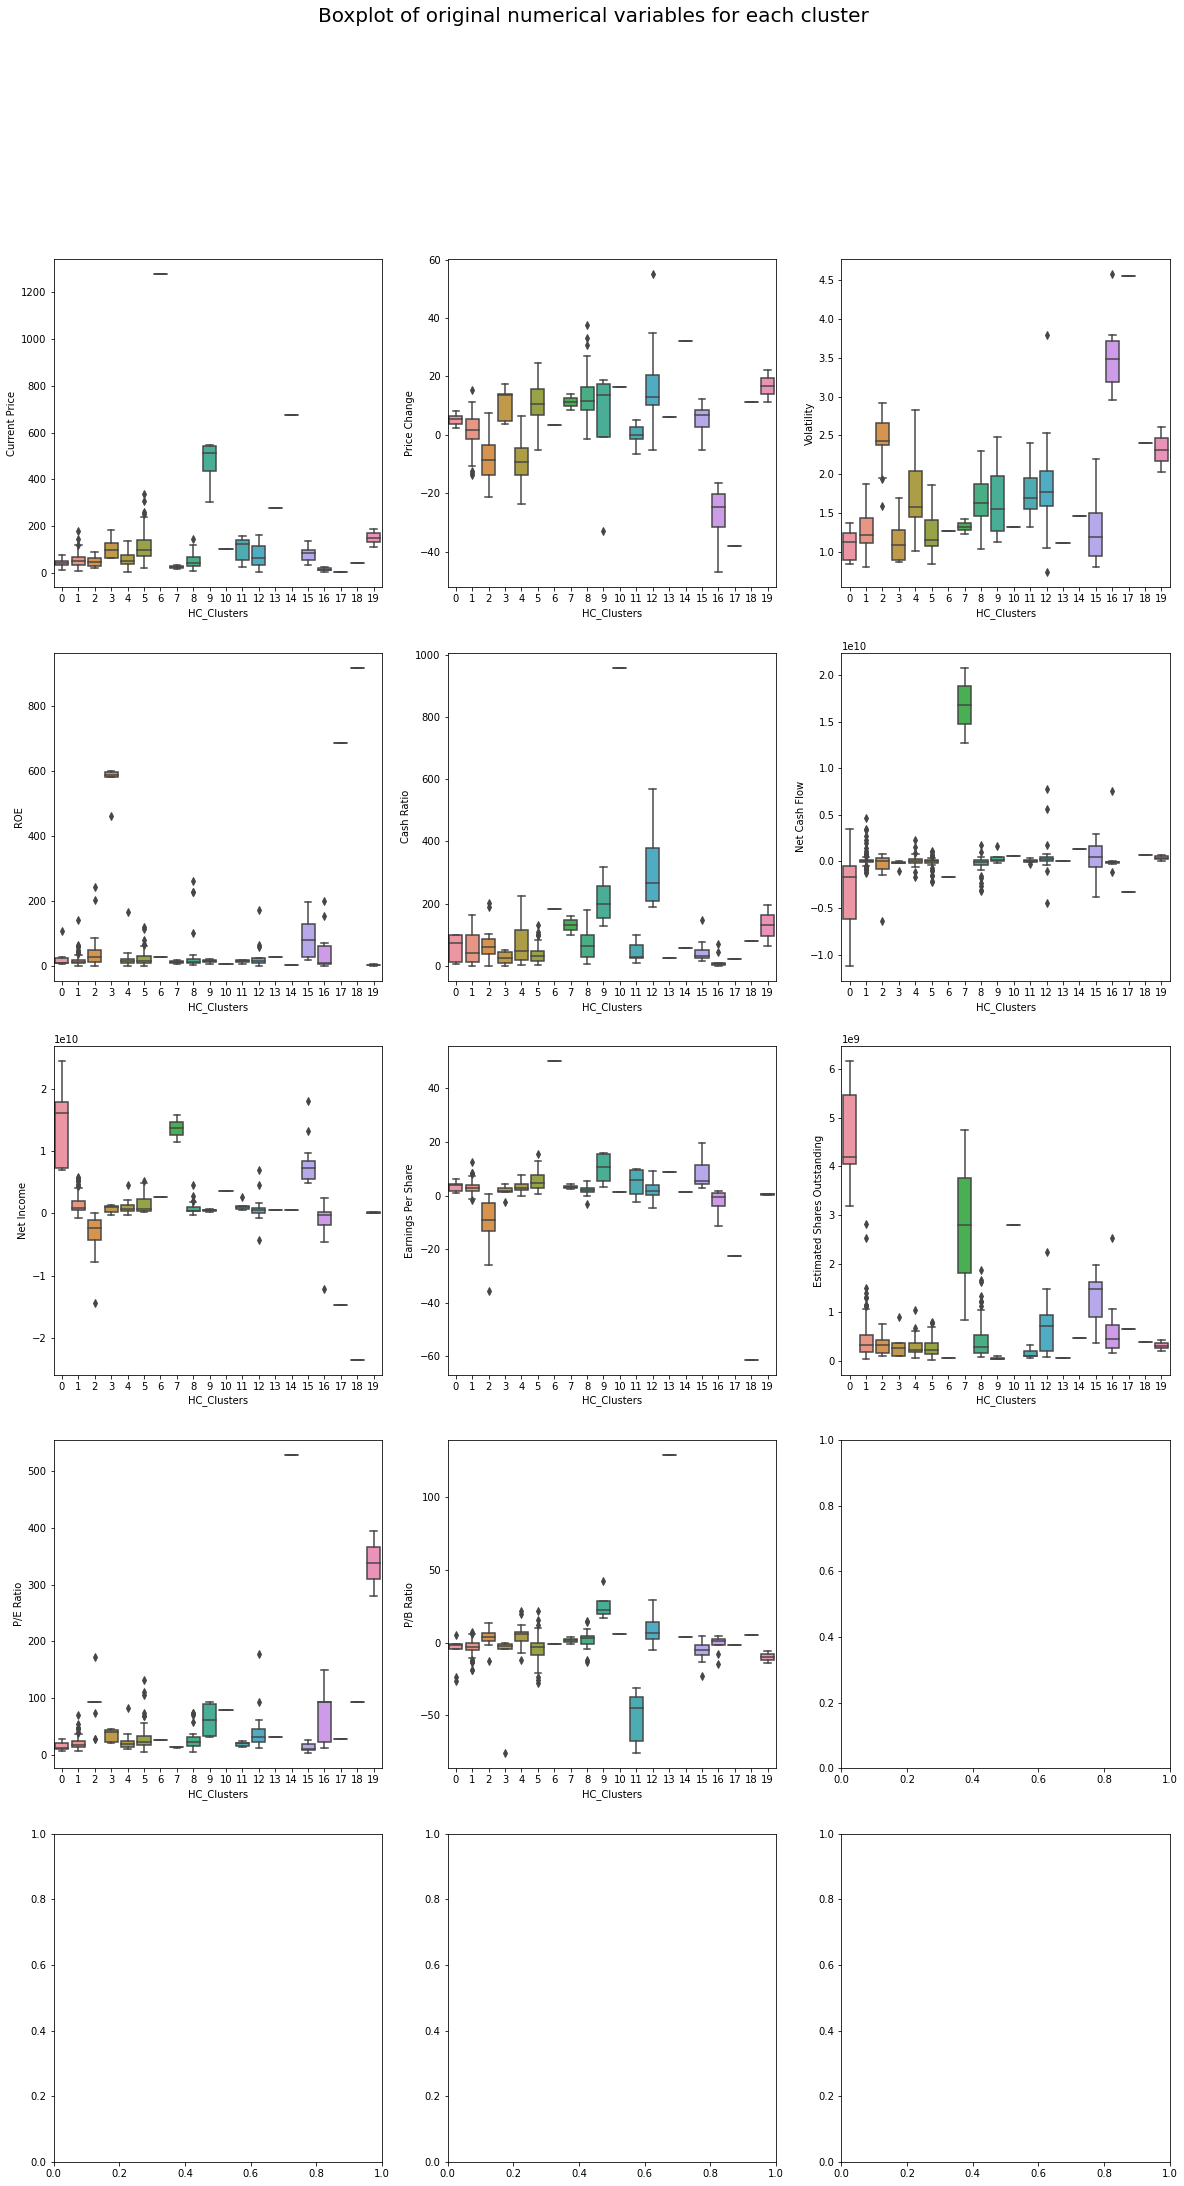

In [50]:
fig, axes = plt.subplots(5, 3, figsize=(20, 35))
fig.suptitle("Boxplot of original numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(19):
    sns.boxplot(ax=axes[ii][0], y=stock_df[num_cols[counter]], x=stock_df["HC_Clusters"])
    counter = counter + 1
    sns.boxplot(ax=axes[ii][1], y=stock_df[num_cols[counter]], x=stock_df["HC_Clusters"])
    counter = counter + 1
    sns.boxplot(ax=axes[ii][2], y=stock_df[num_cols[counter]], x=stock_df["HC_Clusters"])
    counter = counter + 1


fig.tight_layout(pad=2.0)

## Insights

We will look into clusters 16, 6, 5, 2, and 1 only because the other clusters have only 1 to 9 countries in them.

- **Cluster 16**
   - There are 13 companies in this cluster.
   - The P/E ratio is low but the P/B ratio is moderate.
   - Estimated shares outstanding is low and earnings per share is moderate.
   - Net income and net cash flow are moderate.
   - ROE is low and volatility is low with a large range or IQR.
   - Price change is moderate and current price is low.
   
   
- **Cluster 6**
   - There are 31 companies in this cluster.
   - The P/E ratio is low but the P/B ratio is moderate.
   - Estimated shares outstanding is low and earnings per share is moderate.
   - Net income and net cash flow are moderate.
   - ROE is low and volatility is low with a large range or IQR.
   - Price change is moderate to high and current price is low.
   
   
- **Cluster 5**
   - There are 20 companies in this cluster.
   - The P/E ratio is low to moderate but the P/B ratio is moderate.
   - Estimated shares outstanding is low to moderate with a large range and earnings per share is moderate.
   - Net income and net cash flow are moderate.
   - ROE is low and volatility is moderate to high with a large range or IQR.
   - Price change is moderate and current price is low.
   

- **Cluster 2**
   - There are 161 companies in this cluster.
   - The P/E ratio is low but the P/B ratio is moderate.
   - Estimated shares outstanding is low and earnings per share is moderate.
   - Net income and net cash flow are moderate.
   - ROE is low and volatility is low with a large range or IQR.
   - Price change is moderate and current price is low.
   
   
- **Cluster 1**
   - There are 64 companies in this cluster.
   - The P/E ratio is low but the P/B ratio is moderate.
   - Estimated shares outstanding is low and earnings per share is moderate.
   - Net income and net cash flow are moderate.
   - ROE is low and volatility is low with a large range or IQR.
   - Price change is moderate to high and current price is low.


## Recommendations

**Cluster 5 companies are good to invest in with customers who don't mind high volatility or risk.**

## K-means vs Hierarchical Clustering

You compare several things, like:
- Which clustering technique took less time for execution?
- Which clustering technique gave you more distinct clusters, or are they the same?
- How many observations are there in the similar clusters of both algorithms?
- How many clusters are obtained as the appropriate number of clusters from both algorithms?

You can also mention any differences or similarities you obtained in the cluster profiles from both the clustering techniques.

- K means clustering is faster than hierarchial clustering, when k is small. We decided to use 20 for hierarchical clustering and 4 for k means clustering, so k means clustering was computed faster. 
- In comparison to average and centroid linkage, Ward linkage gave more distinct clusters for hierarchical clustering. 
- GROUP 
  0  -       277;
 1  -        11;
2   -       27;
3 -         25;
dtype: int64
For the best K means clustering model, k=4, the clusters contain 277, 11, 27, and 25 companies or different stocks. 
- With hierarchical clustering, we chose 20 clusters, based on the dendrogram/ cophenetic clustering method. Six groups contain one company, 3 contain 5, 2 contain 2, and the other clusters contain 6, 7, 12, 13, 14, 29, 51, and 137.  The trends seen in the 20 boxplots are seen above.  
- To recap, for the clustering k means method of choice, k=4, the boxplot graphs for k=3 show high P/E ratio outliers, high P/B ratio outliers, high cash ratio outliers, high current price outliers, and medium to high earnings per share.  If Trade&Ahead chose the k means method and cluster 3 for a customer, they would have to buy in at a high current price, but the earnings would be high as well, given the metrics stated above.  Although there are only 25 observations in cluster 3, cluster 0 shows different trends in which you would expect companies to fall in for the most part.  The trends seen in cluster 0 are medium to high ROE, medium to low P/B ratio, and medium to high net cash flow outliers. 
- For hierarchical clustering, the groups that stand out are also not the group with the highest number of companies, but a group that Trade&Ahead should choose for their clients would be cluster 3 with a high cash ratio, medium to low volatility, and high price change.

## Actionable Insights and Recommendations

Overall, the best cluster of companies would have to be cluster 3, for k means clustering with k=4.  
It has the best modeling outcomes with high P/E ratio outliers, high P/B ratio outliers, high cash ratio outliers, high current price outliers and medium to high earnings per share.  Even though the current price would potentially be high, all of the other metrics would offset the initial investment and, with a normal measure of volatility, would lead to the best earnings ratio for the Trade&Ahead customers. 